<a href="https://colab.research.google.com/github/TaniaF2021/Predictive-analytics/blob/main/ML_KNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.shape

(303, 14)

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
new_df= df['age']
new_df

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
new_col=df['age']

type(new_col)

pandas.core.series.Series

In [46]:
subset=df[['age','cp','trestbps','chol','thalach','target']]
subset.head()

,age,cp,trestbps,chol,thalach,target
0,63,3,145,233,150,1
1,37,2,130,250,187,1
2,41,1,130,204,172,1
3,56,1,120,236,178,1
4,57,0,120,354,163,1


In [47]:
subset.corr()

,age,cp,trestbps,chol,thalach,target
age,1.000000,-0.068653,0.279351,0.213678,-0.398522,-0.225439
cp,-0.068653,1.000000,0.047608,-0.076904,0.295762,0.433798
trestbps,0.279351,0.047608,1.000000,0.123174,-0.046698,-0.144931
chol,0.213678,-0.076904,0.123174,1.000000,-0.009940,-0.085239
thalach,-0.398522,0.295762,-0.046698,-0.009940,1.000000,0.421741
target,-0.225439,0.433798,-0.144931,-0.085239,0.421741,1.000000


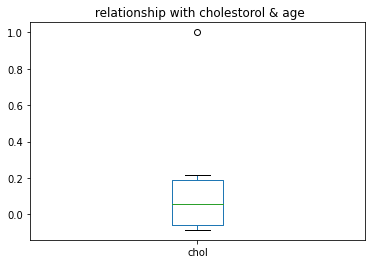

In [48]:
subset.corr().plot(kind='box', x='age', y='chol', title =' relationship with cholestorol & age');

In [49]:
subset.quantile()

age          55.0
cp            1.0
trestbps    130.0
chol        240.0
thalach     153.0
target        1.0
Name: 0.5, dtype: float64

In [50]:
subset.max()

age          77
cp            3
trestbps    200
chol        564
thalach     202
target        1
dtype: int64

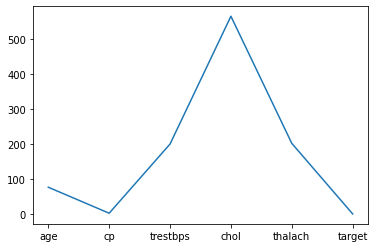

In [51]:
subset.max().plot()

In [52]:
subset.min()

age          29
cp            0
trestbps     94
chol        126
thalach      71
target        0
dtype: int64

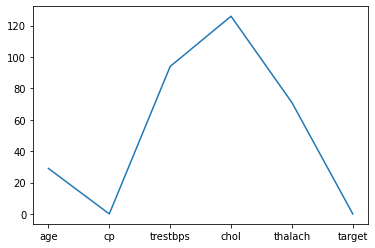

In [53]:
subset.min().plot()

In [54]:
subset.head()

,age,cp,trestbps,chol,thalach,target
0,63,3,145,233,150,1
1,37,2,130,250,187,1
2,41,1,130,204,172,1
3,56,1,120,236,178,1
4,57,0,120,354,163,1


In [57]:
X = subset[['age', 'cp', 'trestbps','chol','thalach','target']]
X

,age,cp,trestbps,chol,thalach,target
0,63,3,145,233,150,1
1,37,2,130,250,187,1
2,41,1,130,204,172,1
3,56,1,120,236,178,1
4,57,0,120,354,163,1
...,...,...,...,...,...,...
298,57,0,140,241,123,0
299,45,3,110,264,132,0
300,68,0,144,193,141,0
301,57,0,130,131,115,0


In [60]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(subset.drop('target', axis=1))
scaled_features = scalar.transform(subset.drop('target', axis=1))
std_data = pd.DataFrame(scaled_features, columns=subset.columns[:-1])


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, subset['target'])

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 5)
(76, 5)
(227,)
(76,)


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
y_pred = knn.predict(x_test)

In [68]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [13, 30]])

In [71]:
score = knn.score(x_test,y_test)

In [72]:
score

0.5789473684210527

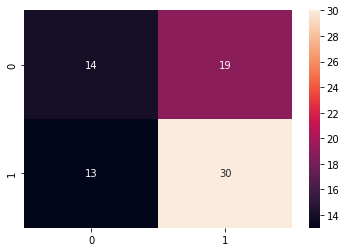

In [73]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.42      0.47        33
           1       0.61      0.70      0.65        43

    accuracy                           0.58        76
   macro avg       0.57      0.56      0.56        76
weighted avg       0.57      0.58      0.57        76



In [120]:
knn5 = KNeighborsClassifier(n_neighbors=29)

In [121]:
knn5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [122]:
y_pred_knn5 = knn5.predict(x_test)

In [123]:
y_pred_knn5

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [124]:
score_knn5 = knn5.score(x_test,y_test)
score_knn5

0.7105263157894737

In [125]:
import numpy as np

In [126]:
from sklearn import metrics

In [127]:
score = []

In [128]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.5789473684210527, 0.6052631578947368, 0.6578947368421053, 0.631578947368421, 0.6578947368421053, 0.6447368421052632, 0.6973684210526315, 0.6710526315789473, 0.6973684210526315, 0.6578947368421053, 0.6710526315789473, 0.631578947368421, 0.6578947368421053, 0.6447368421052632, 0.618421052631579, 0.6578947368421053, 0.6578947368421053, 0.6710526315789473, 0.7105263157894737, 0.6973684210526315, 0.6973684210526315, 0.6973684210526315, 0.7105263157894737, 0.6842105263157895, 0.6973684210526315, 0.6710526315789473, 0.6973684210526315, 0.6842105263157895, 0.7105263157894737, 0.6842105263157895, 0.7105263157894737, 0.7105263157894737, 0.7105263157894737, 0.6973684210526315, 0.7105263157894737, 0.7105263157894737, 0.7105263157894737, 0.7105263157894737, 0.7105263157894737, 0.7236842105263158, 0.7105263157894737, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7236842105263158, 0.7105263157894737, 0.7236842105263158, 0.7105263157894737, 0.7368421052631579]


Text(0, 0.5, 'Accuracy Score')

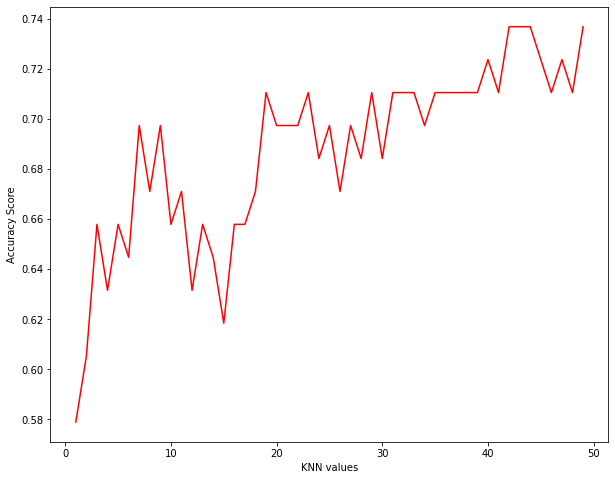

In [129]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score, color='red')
plt.xlabel('KNN values')
plt.ylabel('Accuracy Score')

In [130]:
error_rate = []
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

(Text(0, 0.5, 'Eror Rate'),)

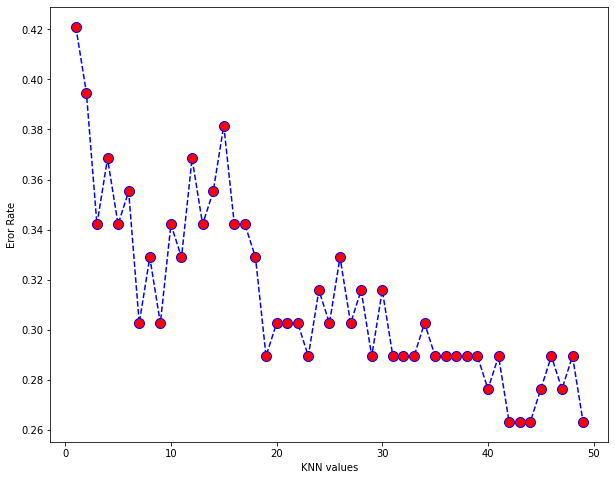

In [131]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'), 